# WCS

In [1]:
import os

from astropy import wcs as w
dir(w)

['DistortionLookupTable',
 'FITSFixedWarning',
 'InconsistentAxisTypesError',
 'InvalidCoordinateError',
 'InvalidSubimageSpecificationError',
 'InvalidTabularParametersError',
 'InvalidTransformError',
 'NoConvergence',
 'NoSolutionError',
 'NoWcsKeywordsFoundError',
 'NonseparableSubimageCoordinateSystemError',
 'SingularMatrixError',
 'Sip',
 'Tabprm',
 'WCS',
 'WCSBase',
 'WCSHDO_CNAMna',
 'WCSHDO_CRPXna',
 'WCSHDO_DOBSn',
 'WCSHDO_EFMT',
 'WCSHDO_P12',
 'WCSHDO_P13',
 'WCSHDO_P14',
 'WCSHDO_P15',
 'WCSHDO_P16',
 'WCSHDO_P17',
 'WCSHDO_PVn_ma',
 'WCSHDO_TPCn_ka',
 'WCSHDO_WCSNna',
 'WCSHDO_all',
 'WCSHDO_none',
 'WCSHDO_safe',
 'WCSHDR_ALLIMG',
 'WCSHDR_AUXIMG',
 'WCSHDR_BIMGARR',
 'WCSHDR_CD00i00j',
 'WCSHDR_CD0i_0ja',
 'WCSHDR_CNAMn',
 'WCSHDR_CROTAia',
 'WCSHDR_DOBSn',
 'WCSHDR_EPOCHa',
 'WCSHDR_IMGHEAD',
 'WCSHDR_LONGKEY',
 'WCSHDR_PC00i00j',
 'WCSHDR_PC0i_0ja',
 'WCSHDR_PIXLIST',
 'WCSHDR_PROJPn',
 'WCSHDR_PS0i_0ma',
 'WCSHDR_PV0i_0ma',
 'WCSHDR_RADECSYS',
 'WCSHDR_VELREFa',
 

## The WCS files returned by astrometry.net

In [2]:
PATH = '../astrophotography_data/MilkyWayPrettyBoy/wcs/first_attempt/'

In [3]:
# wcs file appears to contain a properly-formatted WCS
# From the docs: a FITS WCS header for the solution.
w.WCS(os.path.join(PATH, 'wcs.fits')).wcs

       flag: 137
      naxis: 2
      crpix: 0x7fb0c9c56db0
               2022.1       1525.9    
         pc: 0x7fb0c9c56dc0
    pc[0][]:   0.032289    -0.0064050 
    pc[1][]:   0.0065515    0.032660  
      cdelt: 0x7fb0c9c4bc50
               1.0000       1.0000    
      crval: 0x7fb0c9c4bc60
               332.66       55.843    
      cunit: 0x7fb0c9c5f7f0
             "deg"
             "deg"
      ctype: 0x7fb0c9c6bcb0
             "RA---TAN-SIP"
             "DEC--TAN-SIP"
    lonpole: 180.000000
    latpole: 55.842991
    restfrq: 0.000000
    restwav: 0.000000
        npv: 0
     npvmax: 0
         pv: 0x0
        nps: 0
     npsmax: 0
         ps: 0x0
         cd: 0x7fb0c9c69100
    cd[0][]:   0.032289    -0.0064050 
    cd[1][]:   0.0065515    0.032660  
      crota: 0x7fb0c9c4bc70
               0.0000       0.0000    
     altlin: 2
     velref: 0
        alt: ' '
     colnum: 0
      colax: 0x7fb0c9c69120
                 0      0
      cname: 0x7fb0c9c706c0
         

In [4]:
# From the docs: a FITS WCS header for the solution.
import astropy.io.fits as fits
f = fits.open(os.path.join(PATH, 'wcs.fits'))
f[0].header

SIMPLE  =                    T / Standard FITS file                             
BITPIX  =                    8 / ASCII or bytes array                           
NAXIS   =                    0 / Minimal header                                 
EXTEND  =                    T / There may be FITS ext                          
WCSAXES =                    2 / no comment                                     
CTYPE1  = 'RA---TAN-SIP' / TAN (gnomic) projection + SIP distortions            
CTYPE2  = 'DEC--TAN-SIP' / TAN (gnomic) projection + SIP distortions            
EQUINOX =               2000.0 / Equatorial coordinates definition (yr)         
LONPOLE =                180.0 / no comment                                     
LATPOLE =                  0.0 / no comment                                     
CRVAL1  =        332.657575565 / RA  of reference point                         
CRVAL2  =        55.8429909287 / DEC of reference point                         
CRPIX1  =        2022.115804

In [5]:
# axy file contains a bintable with coordinates in pixels, fluxes,
# and backgrounds for each detected feature.
# From the docs: a FITS BINTABLE of the sources we extracted, plus 
# headers that describe the job (how the image is going to be solved).
f = fits.open(os.path.join(PATH, 'axy.fits'))
f[1].data

FITS_rec([( 127.09326,  208.35666, 210.17456  , 13.03569 ),
          ( 660.3689 , 1721.6233 , 168.79266  , 48.35829 ),
          (3818.616  ,  747.7415 , 116.52025  , 39.940536), ...,
          (3143.4363 , 2161.9797 ,   3.0638847, 56.60411 ),
          (3039.5    , 1597.5    ,   3.1462097, 56.453156),
          (2759.2383 , 1451.0431 ,   0.6612549, 57.561954)],
         dtype=(numpy.record, [('X', '>f4'), ('Y', '>f4'), ('FLUX', '>f4'), ('BACKGROUND', '>f4')]))

In [6]:
len(f[1].data)

6005

In [7]:
f[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
LONGSTRN= 'OGIP 1.0' / The OGIP long string convention may be used              
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        
COMMENT character at the end of the string which is then continued              
COMMENT on subsequent keywords whose name = 'CONTINUE'.                         
IMAGEW  =                 4240 / image width                                    
IMAGEH  =                 28

In [8]:
f[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                 6005 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'X       '           / label for field   1                            
TFORM1  = 'E       '           / data format of field: 4-byte REAL              
TTYPE2  = 'Y       '           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'FLUX    '        

In [9]:
# corr file contains assorted info for a subset (of stars? of fields?)
# From the docs: Correspondences output filename
f = fits.open(os.path.join(PATH, 'corr.fits'))
f[1].data

FITS_rec([(1156.22949219, 2815.0012207 , 2.45283032e+02, 61.56926003, 1155.50756289, 2.79928326e+03, 2.45997943e+02, 61.51408336,  18,    3, 0.73271327, 111.22337  , 50.212875 ),
          (1499.41955566, 1370.37133789, 3.10350239e+02, 45.19261382, 1501.17912481, 1.37301369e+03, 3.10357973e+02, 45.28033423,   1,    7, 0.99081522,  84.549416 , 58.41529  ),
          ( 937.50567627, 2201.57983398, 2.69223768e+02, 51.46140863,  937.65318872, 2.20375420e+03, 2.69151572e+02, 51.48894944,  11,    9, 0.98122202, 125.17566  , 50.90413  ),
          (2667.78344727, 1737.67358398, 1.27390389e+01, 60.84059041, 2671.91829958, 1.74897409e+03, 1.32678186e+01, 61.12358221, 307,   13, 0.86559855,  92.072014 , 59.953392 ),
          (1375.20703125, 2579.14746094, 2.57205918e+02, 65.75483876, 1373.48744891, 2.57903900e+03, 2.57196773e+02, 65.71463972,  22,   14, 0.97828134,  90.1364   , 54.26523  ),
          (1311.7677002 , 1284.25463867, 3.05538769e+02, 40.18737082, 1313.71829389, 1.28654089e+03, 3.05

In [10]:
len(f[1].data)

736

In [11]:
f[0].header

SIMPLE  =                    T / Standard FITS file                             
BITPIX  =                    8 / ASCII or bytes array                           
NAXIS   =                    0 / Minimal header                                 
EXTEND  =                    T / There may be FITS ext                          

In [12]:
# rdls file contains RA and DEC for each detected star (?)
# From the docs: a FITS BINTABLE with the RA,Dec of sources we extracted from the image.
f = fits.open(os.path.join(PATH, 'rdls.fits'))
f[1].data

FITS_rec([(2.97694509e+02,  8.86738492), (3.10357973e+02, 45.28033423),
          (3.17928956e+01, 23.46276111), (2.09653334e+00, 29.09082804),
          (5.10806189e+01, 49.86124282), (4.70422072e+01, 40.9556512 ),
          (3.79466195e+01, 89.26413449), (1.41770881e+01, 60.71674965),
          (1.74325058e+01, 35.62083027), (3.09746708e+01, 42.32984306),
          (2.29214720e+00, 59.15019446), (2.69151572e+02, 51.48894944),
          (3.05557085e+02, 40.25668109), (2.86597989e+01, 20.80828251),
          (2.14525942e+01, 60.23539777), (3.11551847e+02, 33.96950834),
          (3.45943077e+02, 28.08247361), (3.19644126e+02, 62.58546109),
          (2.45997943e+02, 61.51408336), (2.96243520e+02, 45.1306961 ),
          (4.61991275e+01, 53.50645165), (3.23855292e+01, 34.9873864 ),
          (2.57196773e+02, 65.71463972), (2.84735935e+02, 32.68955307),
          (2.92680362e+02, 27.9596814 ), (2.88138179e+02, 67.66132637),
          (3.22164900e+02, 70.56069503), (2.85986848e+01, 63.670

In [13]:
len(f[1].data)

971

In [14]:
f[0].header

SIMPLE  =                    T / Standard FITS file                             
BITPIX  =                    8 / ASCII or bytes array                           
NAXIS   =                    0 / Minimal header                                 
EXTEND  =                    T / There may be FITS ext                          
AN_FILE = 'RDLS    ' / Astrometry.net file type                                 
HISTORY Created by the Astrometry.net suite.                                    
HISTORY For more details, see http://astrometry.net.                            
HISTORY Git URL https://github.com/dstndstn/astrometry.net                      
HISTORY Git revision 0.78-10-g73017cc4                                          
HISTORY Git date Wed_Oct_23_15:56:15_2019_+0000                                 
HISTORY This "indexrdls" file was created by the program "blind".               
HISTORY   It contains the RA/DEC of index objects that were found               
HISTORY   inside a solved fi

## Check solution 

Plot star positions on input image.

In [15]:
f = fits.open(os.path.join(PATH, 'axy.fits'))
f[1].data

FITS_rec([( 127.09326,  208.35666, 210.17456  , 13.03569 ),
          ( 660.3689 , 1721.6233 , 168.79266  , 48.35829 ),
          (3818.616  ,  747.7415 , 116.52025  , 39.940536), ...,
          (3143.4363 , 2161.9797 ,   3.0638847, 56.60411 ),
          (3039.5    , 1597.5    ,   3.1462097, 56.453156),
          (2759.2383 , 1451.0431 ,   0.6612549, 57.561954)],
         dtype=(numpy.record, [('X', '>f4'), ('Y', '>f4'), ('FLUX', '>f4'), ('BACKGROUND', '>f4')]))

In [16]:
%pylab notebook
%matplotlib notebook
import os, glob
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


/Users/busko/Projects/software/miniconda3/envs/raw/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
path = '/Users/busko/Projects/astrophotography_data/MilkyWayPrettyBoy'

In [18]:
im = Image.open(os.path.join(path, 'annotated', '12800_DSC03779_annotated.tiff'))

<IPython.core.display.Javascript object>


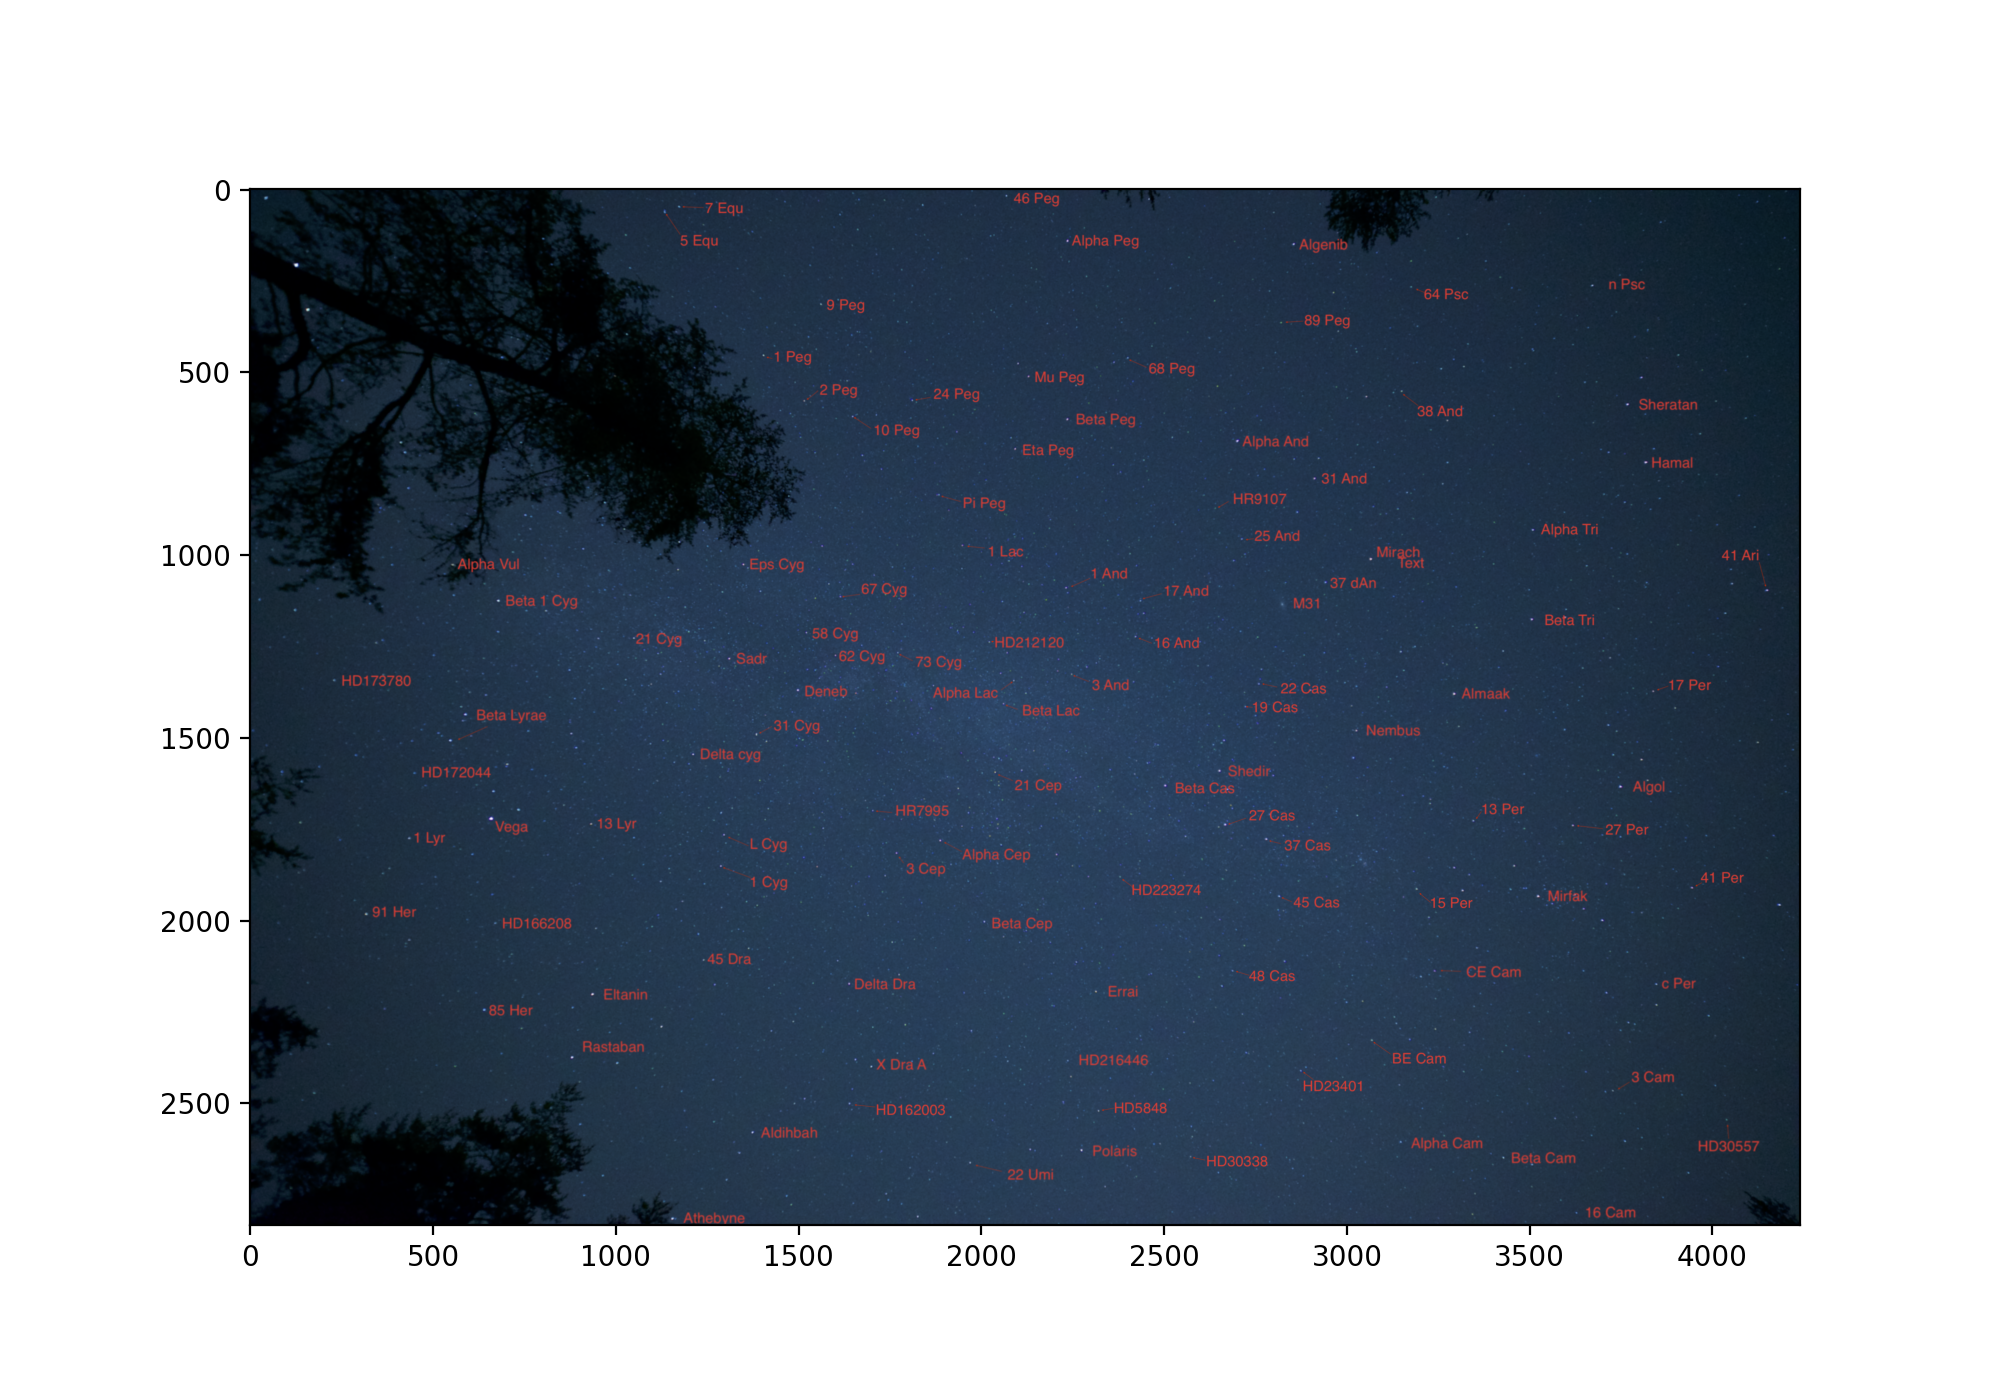

In [19]:
plt.figure(figsize=[10,7])
plt.imshow(im)